In [10]:
import random 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.figure
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_blobs 
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy 
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

In [11]:
def getMaxSlope(fileText):
    #Get the data text sorted out
    column1 = []
    column2 = []
    for row in fileText.splitlines():
        if(row[7]!=" "):
            column1.append(row[7:15])
            column2.append(row[23:36])
    #Convert to numerical data     
    column1_num = pd.to_numeric(column1)
    column2_num = pd.to_numeric(column2)
    
    #Get derivatives
    d = np.diff(column2_num, axis=0)/np.diff(column1_num, axis=0)
    #Find maximum slope in the above data
    index = np.where(d==d.max())[0][0]
    #print("Max Slope X, Y: ("+str(column2_num[index])+", "+str(column1_num[index])+")")
    return [column2_num[index], column1_num[index]]

In [34]:
class cluster:
    
    def k_means_cluster(self, X):
        mpl.style.use('default')
        np.random.seed(0)
        X = StandardScaler().fit_transform(X)
        k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
        k_means.fit(X)
        k_means_labels = k_means.labels_
        k_means_cluster_centers = k_means.cluster_centers_
        # Initialize the plot with the specified dimensions.
        fig = plt.figure(figsize=(6, 4))

        # Colors uses a color map, which will produce an array of colors based on
        # the number of labels there are. We use set(k_means_labels) to get the
        # unique labels.
        colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

        # Create a plot
        ax = fig.add_subplot(1, 1, 1)

        # For loop that plots the data points and centroids.
        # k will range from 0-3, which will match the possible clusters that each
        # data point is in.
        for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

            # Create a list of all data points, where the data poitns that are 
            # in the cluster (ex. cluster 0) are labeled as true, else they are
            # labeled as false.
            my_members = (k_means_labels == k)

            # Define the centroid, or cluster center.
            cluster_center = k_means_cluster_centers[k]

            # Plots the datapoints with color col.
            ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='o', markersize=8)

            # Plots the centroids with specified color, but with a darker outline
            ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=8)

        # Title of the plot
        ax.set_title('KMeans')

        # Remove x-axis ticks
        ax.set_xticks(())

        # Remove y-axis ticks
        ax.set_yticks(())

        # Show the plot
        plt.show()

        return k_means_labels
    
    def agglom_cluster(self, X):
        mpl.style.use('default')
        agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
        agglom.fit(X)
        # Create a figure of size 6 inches by 4 inches.
        plt.figure(figsize=(6,4))

        # These two lines of code are used to scale the data points down,
        # Or else the data points will be scattered very far apart.

        # Create a minimum and maximum range of X1.
        x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

        # Get the average distance for X1.
        X = (X - x_min) / (x_max - x_min)
        dist_matrix = distance_matrix(X,X) 
        #print(dist_matrix)
        Z = hierarchy.linkage(dist_matrix, 'complete')
        dendro = hierarchy.dendrogram(Z)

        return agglom.labels_
    
    def DBSCAN_cluster(self, X):
        mpl.style.use('default')
        X = StandardScaler().fit_transform(X)
        epsilon = 0.3
        minimumSamples = 1
        db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        unique_labels = set(labels)

        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = 'k'

            class_member_mask = (labels == k)

            # Plot the datapoints that are clustered
            xy = X[class_member_mask & core_samples_mask]
            plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

            # Plot the outliers
            xy = X[class_member_mask & ~core_samples_mask]
            plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
        return labels

In [35]:
class Graph:
    def each_graph(self):
        mpl.style.use('ggplot')
        path = "/Users/johnrussell/Desktop/XAFS-Data/*.nor"
        for file in glob.glob(path):
            #print(file[file.index('XAFS'):]+"\n")
            fileCSV = pd.read_csv(file, skiprows=37)
            fileText = fileCSV.to_string()
            column1 = []
            column2 = []
            for row in fileText.splitlines():
                if(row[7]!=" "):
                    column1.append(row[7:15])
                    column2.append(row[23:36])
            #Convert to numerical data     
            column1_num = pd.to_numeric(column1)
            column2_num = pd.to_numeric(column2)
            columns_df = pd.DataFrame(data=np.array([column1_num, column2_num])).transpose()
            columns_df.columns = ['X','Y']
            mpl.style.use('ggplot')
            columns_df.plot(x='X', y='Y', kind='line', figsize=(20,10))
    
    def all_graphs(self):
        mpl.style.use('ggplot')
        path = "/Users/johnrussell/Desktop/XAFS-Data/*.nor"
        fig = plt.figure()
        for file in glob.glob(path):
            ax = fig.add_subplot()
            fileCSV = pd.read_csv(file, skiprows=37)
            fileText = fileCSV.to_string()
            column1 = []
            column2 = []
            for row in fileText.splitlines():
                if(row[7]!=" "):
                    column1.append(row[7:15])
                    column2.append(row[23:36])
            #Convert to numerical data     
            column1_num = pd.to_numeric(column1)
            column2_num = pd.to_numeric(column2)

            columns_df = pd.DataFrame(data=np.array([column1_num, column2_num])).transpose()
            columns_df.columns = ['X','Y']
            mpl.style.use('ggplot')
            columns_df.plot(x='X', y='Y', kind='line', figsize=(20,10), ax=ax)
    def cluster_graph(self, cluster_array):
        mpl.style.use('ggplot')
        #cluster_array = np.array([3, 3, 3, 1, 1, 3, 0, 3, 1, 0, 2, 0, 3, 3])
        arrays = []
        for i in range(np.max(cluster_array)+1):
            arrays.append([])
        index = 0
        path = "/Users/johnrussell/Desktop/XAFS-Data/*.nor"
        for file in glob.glob(path):
            fileCSV = pd.read_csv(file, skiprows=37)
            fileText = fileCSV.to_string()
            column1 = []
            column2 = []
            for row in fileText.splitlines():
                if(row[7]!=" "):
                    column1.append(row[7:15])
                    column2.append(row[23:36])
            #Convert to numerical data     
            column1_num = pd.to_numeric(column1)
            column2_num = pd.to_numeric(column2)
            columns_df = pd.DataFrame(data=np.array([column1_num, column2_num])).transpose()
            columns_df.columns = ['X','Y']
            cluster_arr_index = cluster_array[index]
            #print(cluster_arr_index)
            arrays[cluster_arr_index].append(columns_df)
            index = index + 1

        figs = []
        fig = plt.figure()
        subplots = []
        #print(len(arrays[3]))
        for i in range(len(arrays)):
            figs.append(plt.figure())
            #subplots.append(fig.add_subplot(2, 2, i+1))
        for i in range(len(arrays)):
            ax = figs[i].add_subplot()
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_title('X and Y')
            for figure in arrays[i]:
                mpl.style.use('ggplot')
                figure.plot(x='X', y='Y', kind='line', figsize=(20,10), xlim=(6200,7600), ylim=(0,4), ax=ax)
    

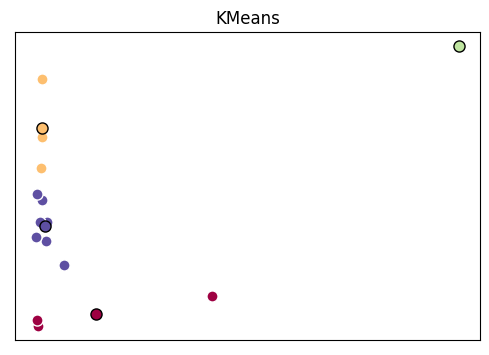

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:72: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


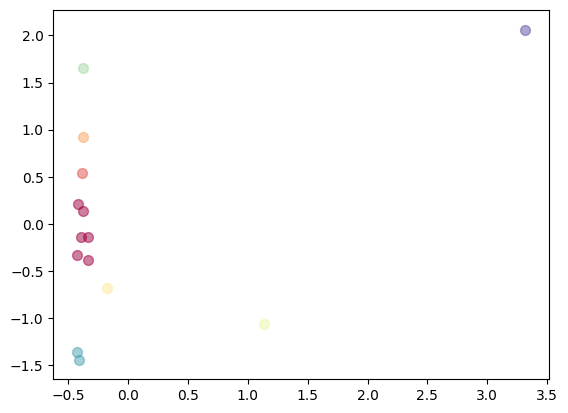

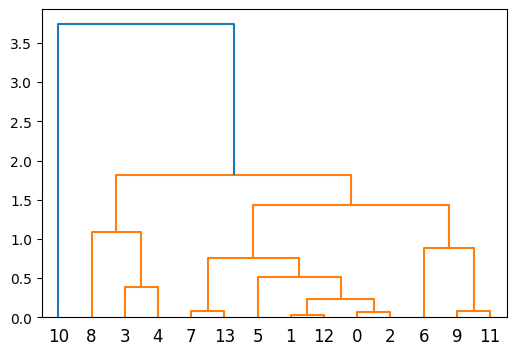

In [36]:
path = "/Users/johnrussell/Desktop/XAFS-Data/*.nor"
datapoints = []
num = 0
for file in glob.glob(path):
    #print(num, file[file.index('XAFS'):]+"\n")
    num = num + 1
    fileCSV = pd.read_csv(file, skiprows=37)
    fileString = fileCSV.to_string()
    datapoints.append(getMaxSlope(fileString))
#print(datapoints)
c = cluster()
k_means_arr = c.k_means_cluster(datapoints)
DBSCAN_arr = c.DBSCAN_cluster(datapoints)
agglom_arr = c.agglom_cluster(datapoints)

<Figure size 640x480 with 0 Axes>

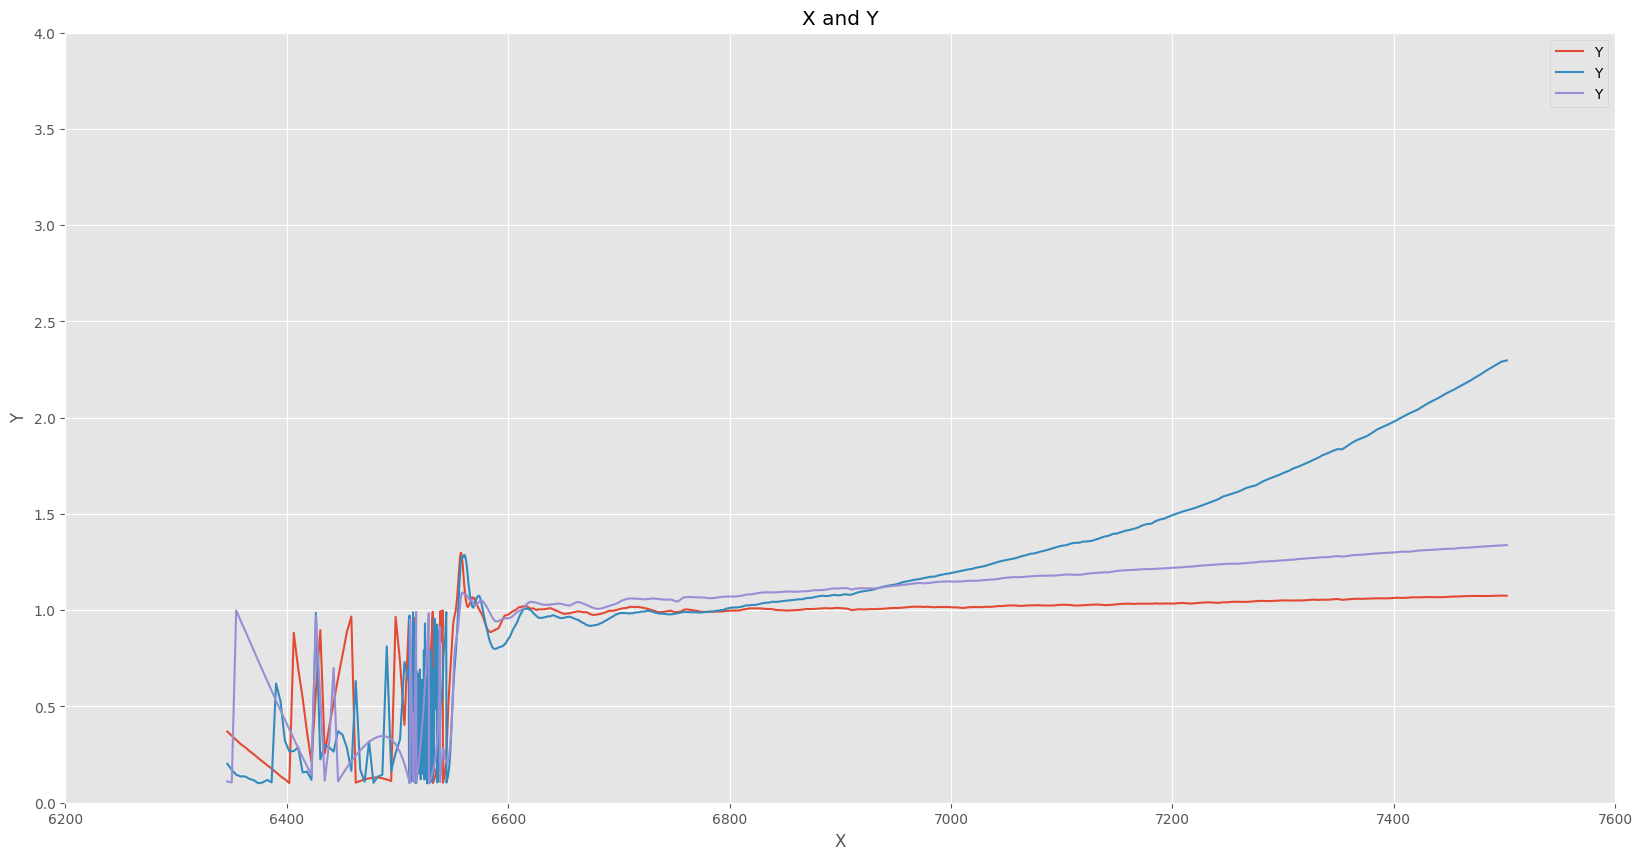

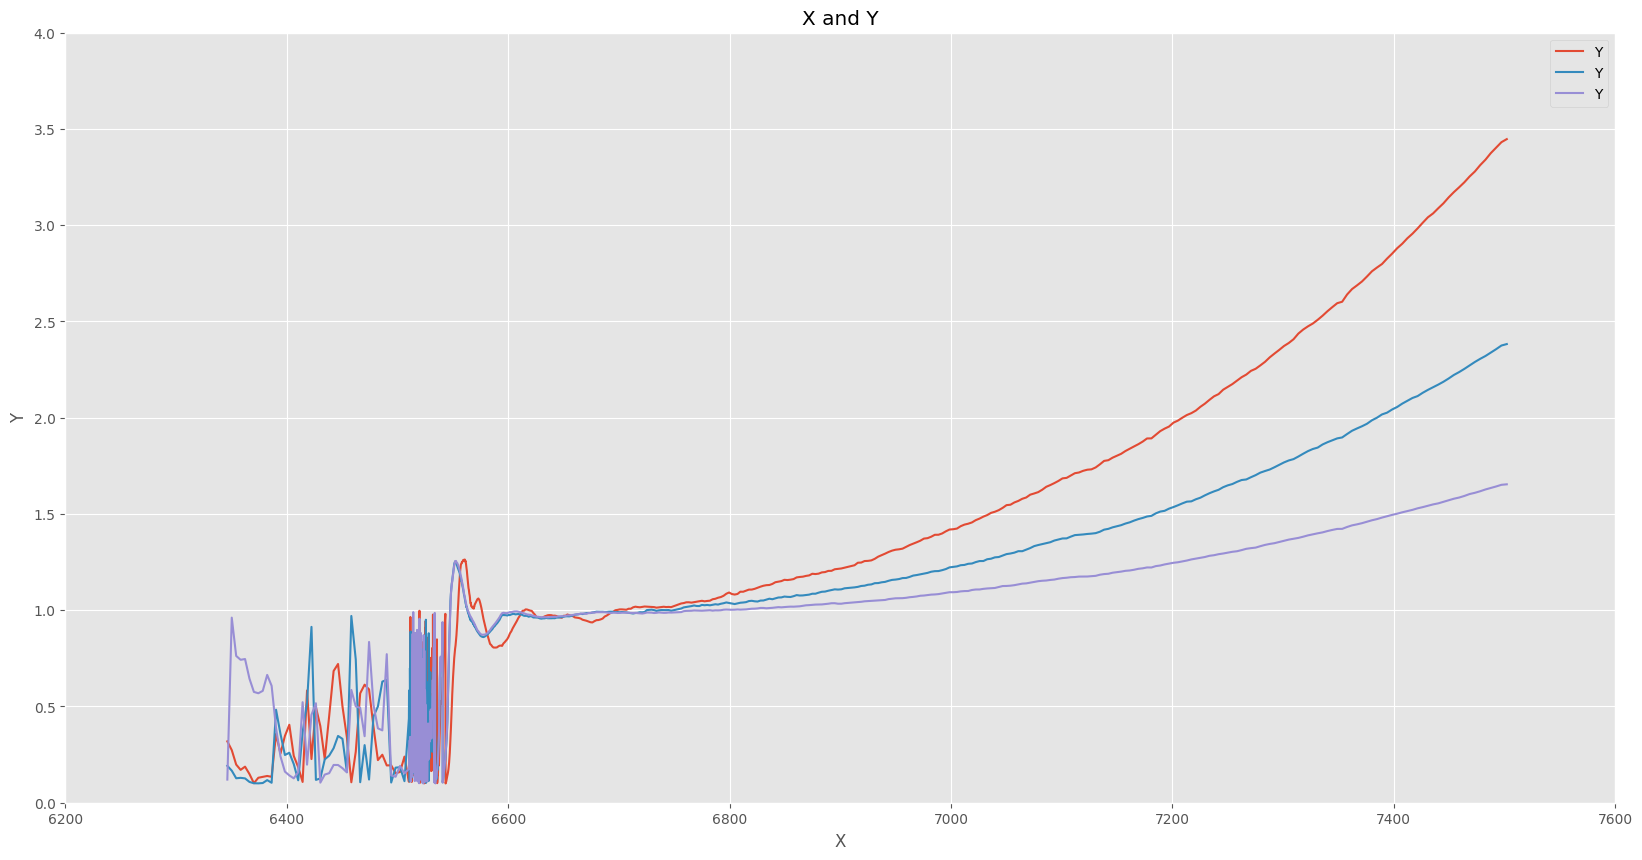

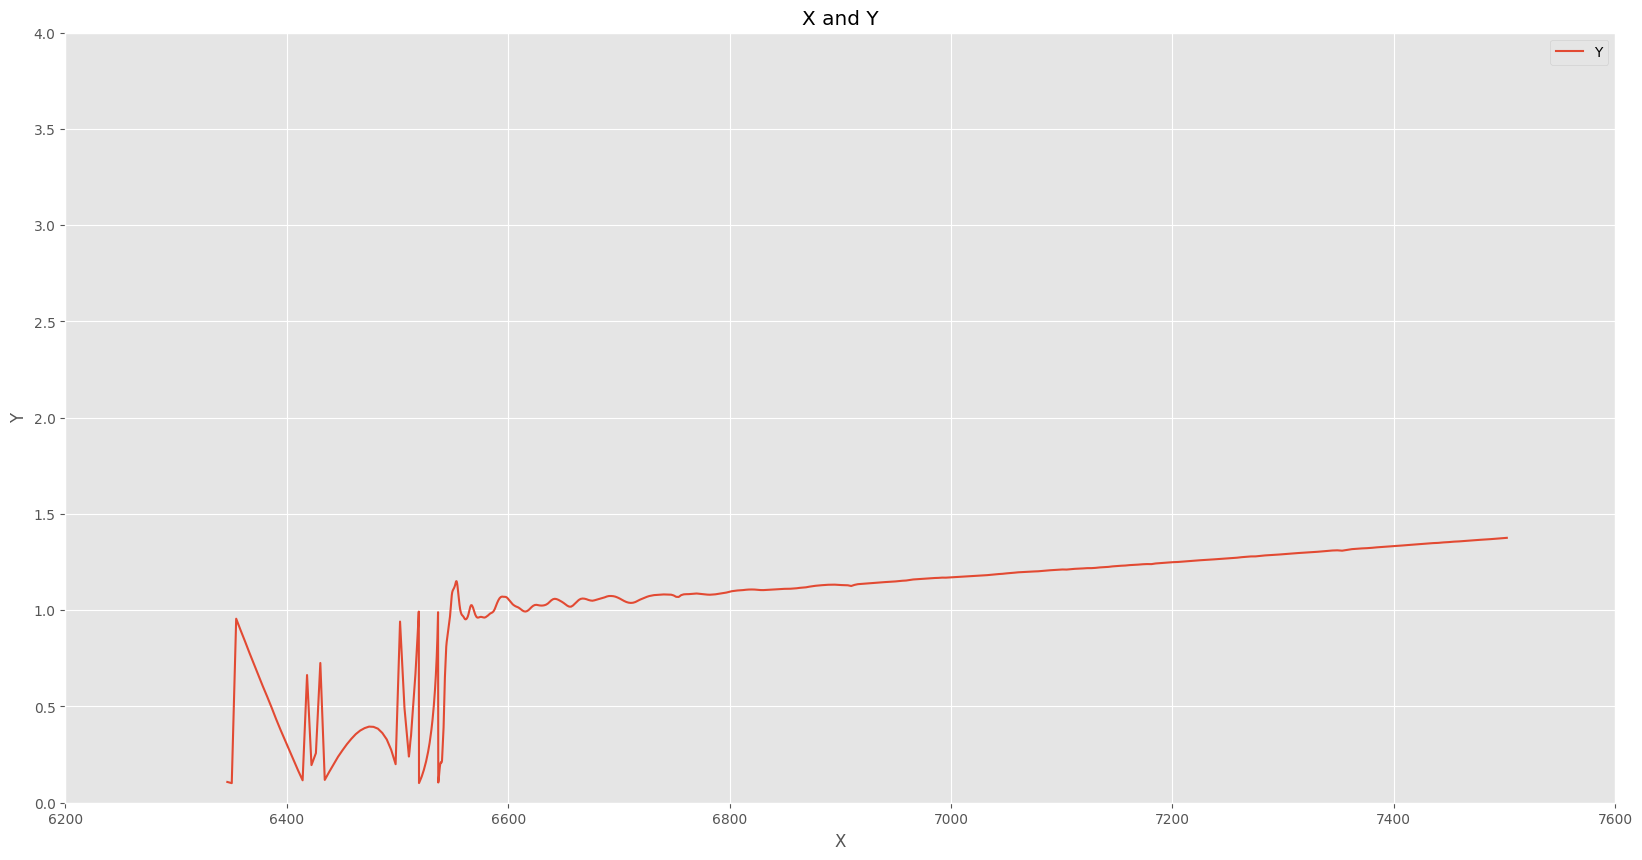

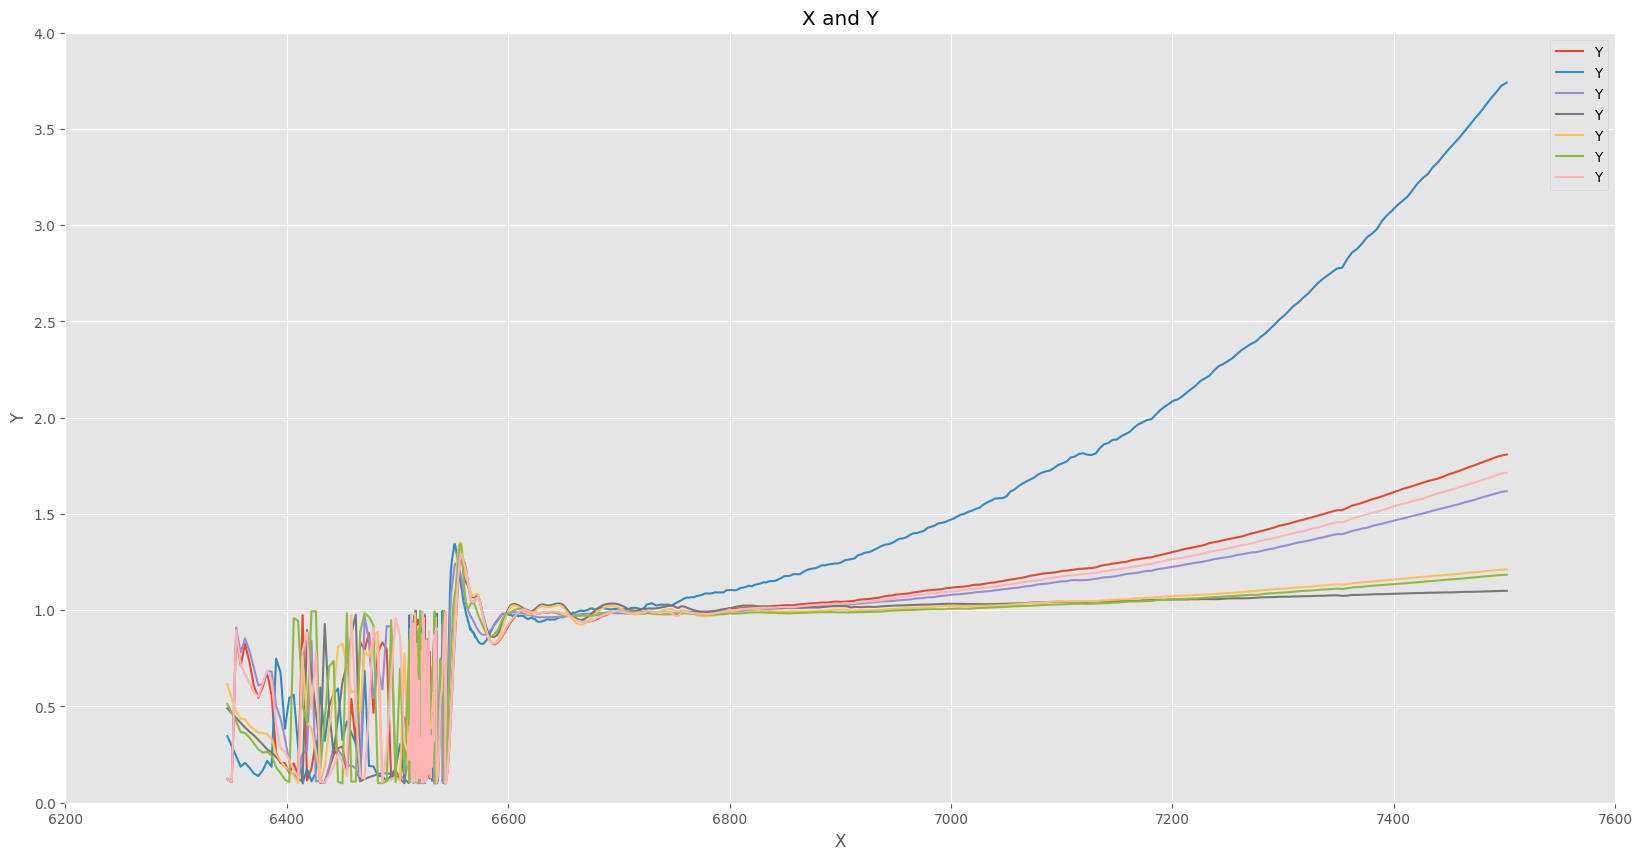

In [37]:
g = Graph()
g.cluster_graph(k_means_arr)

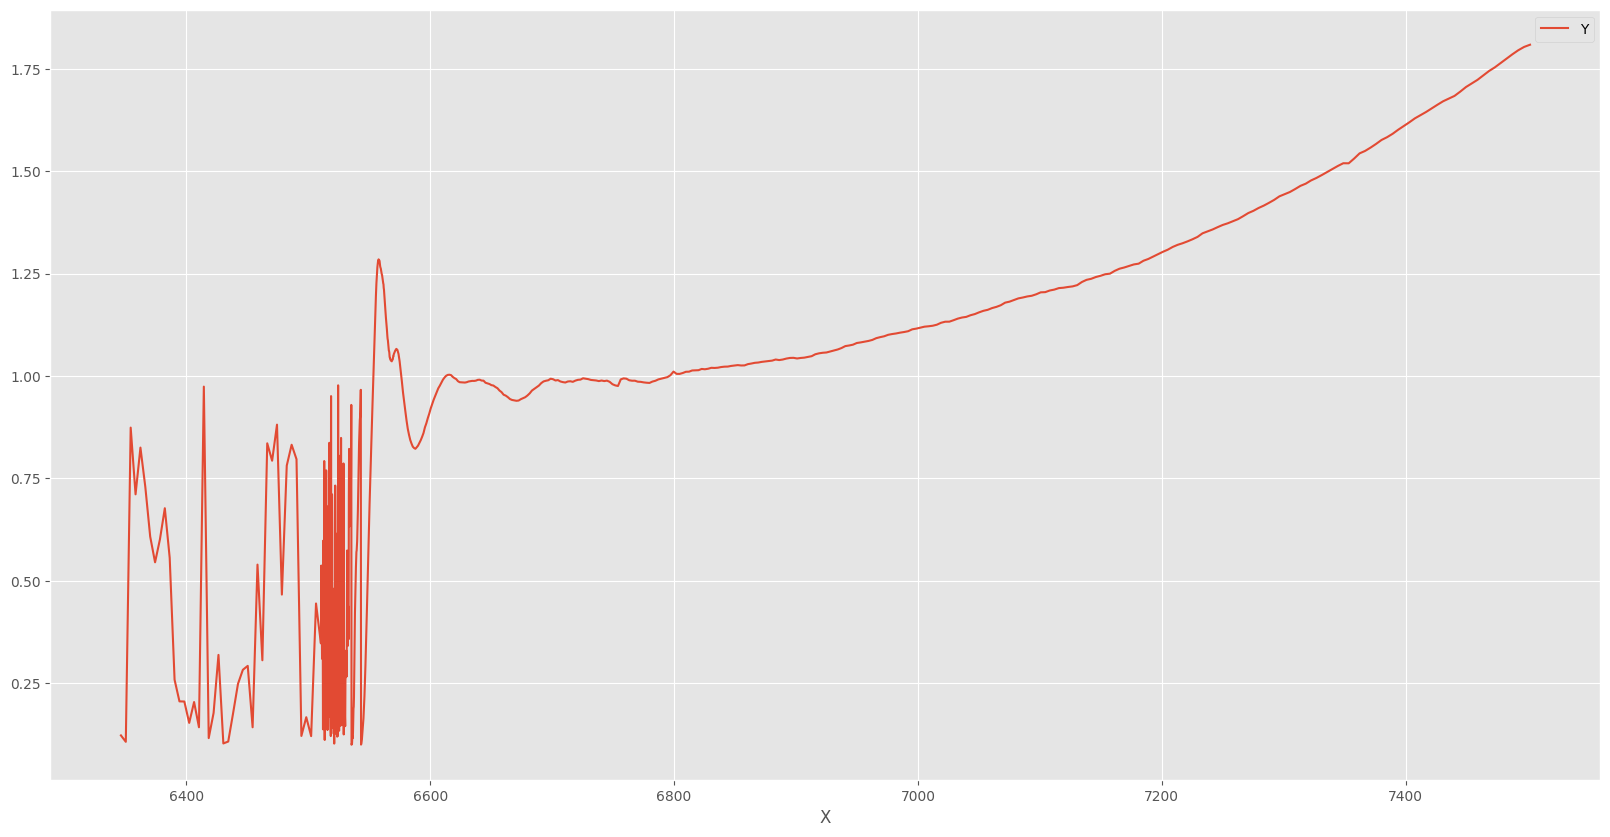

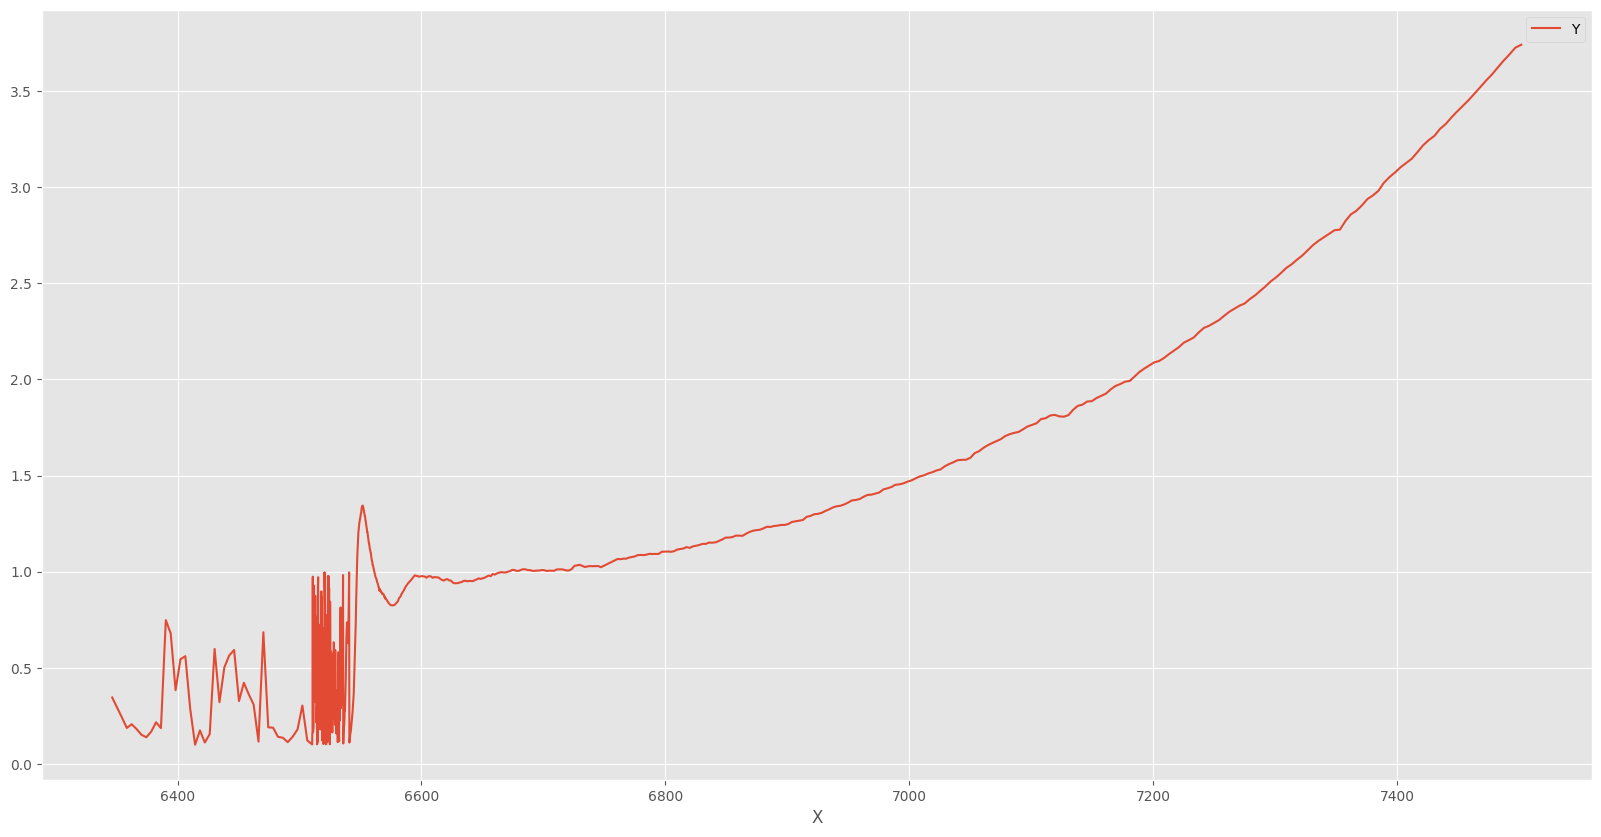

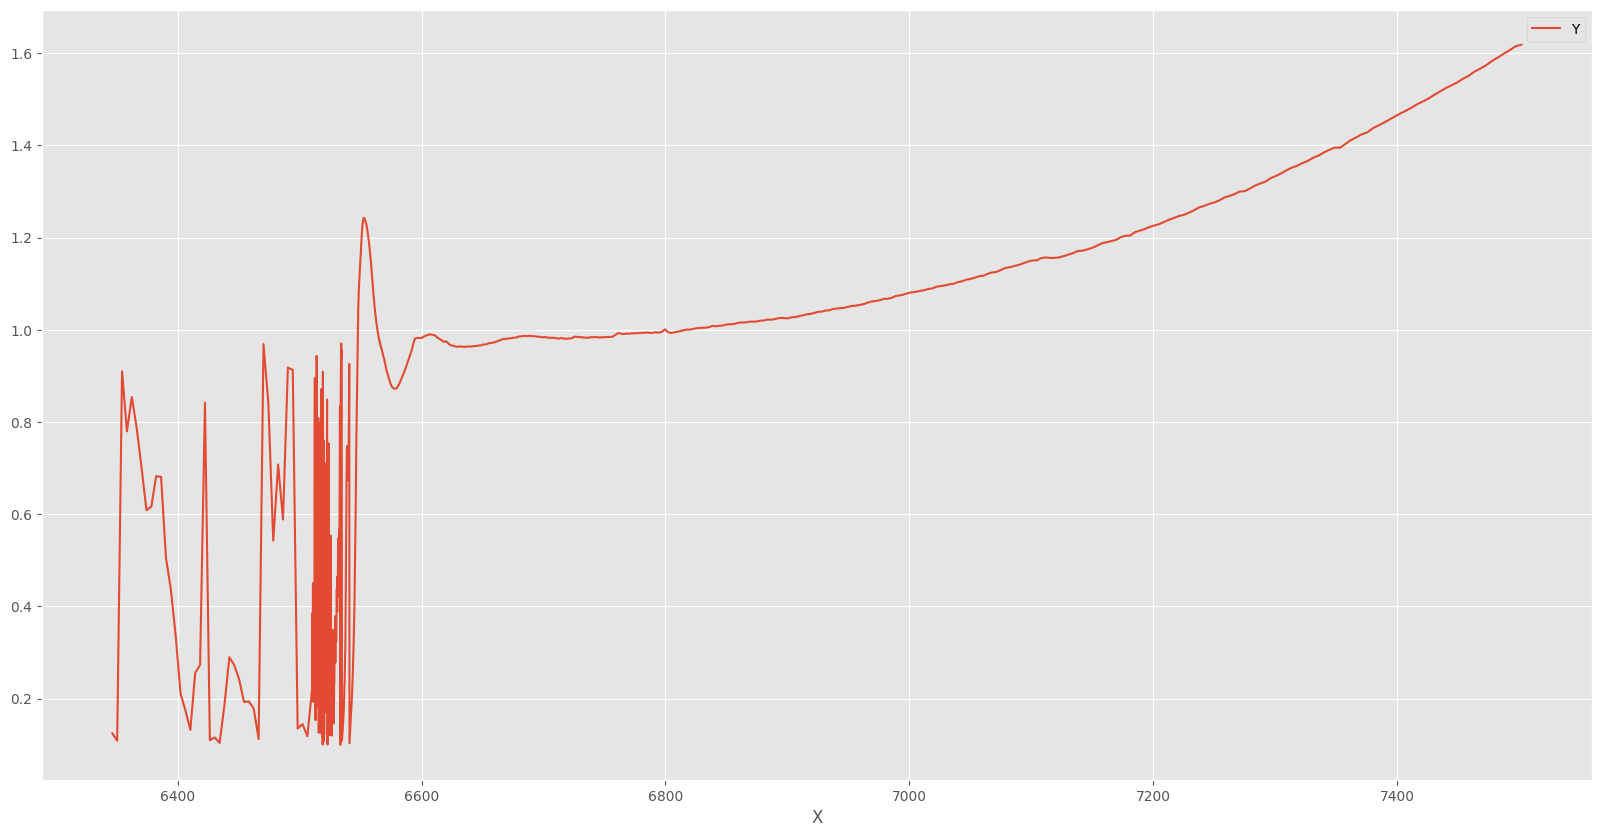

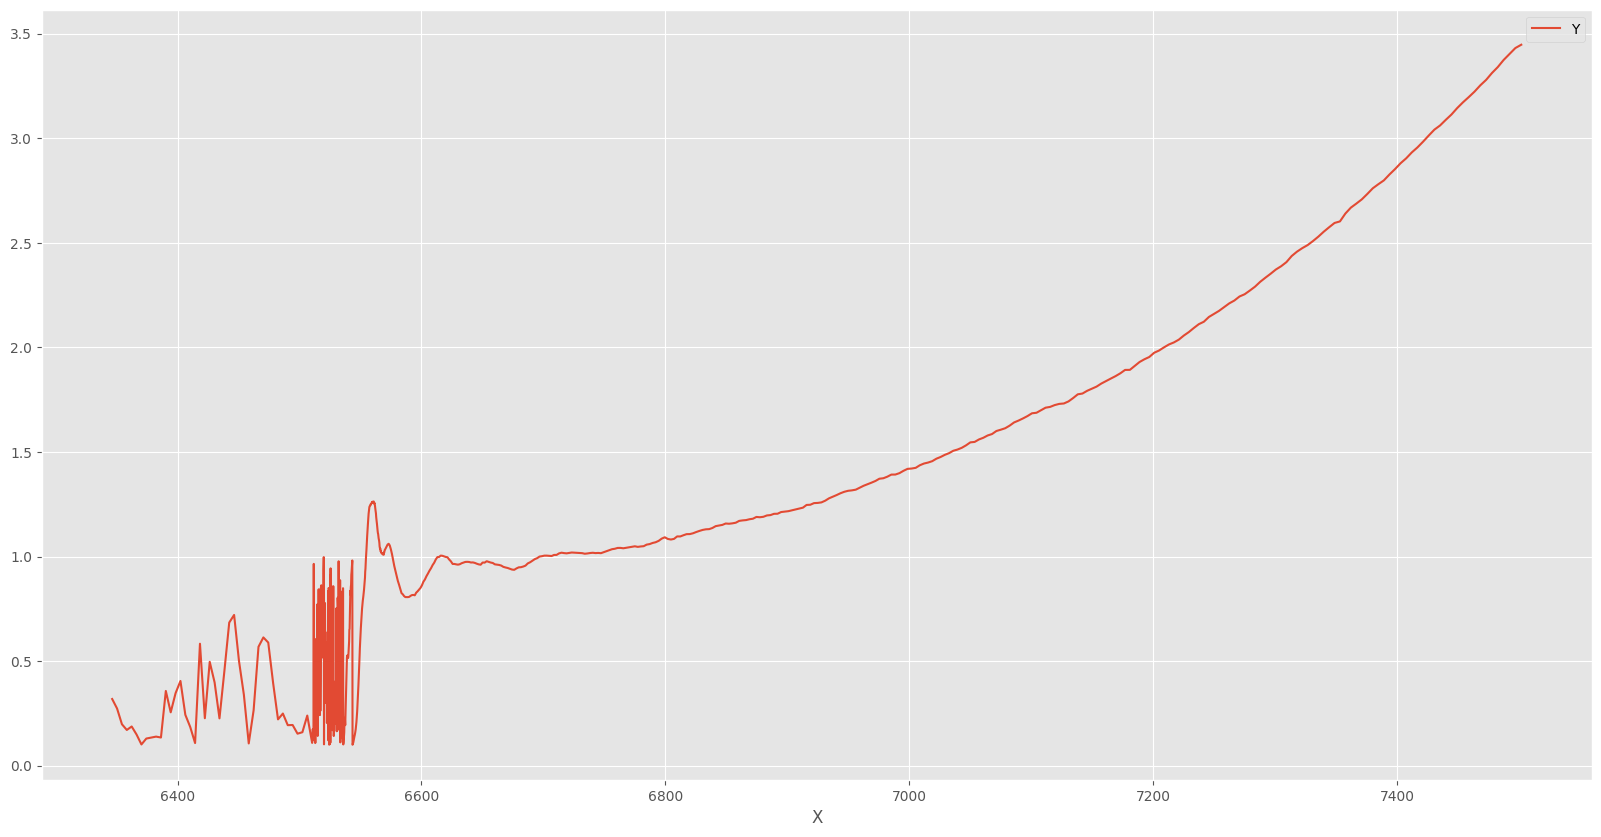

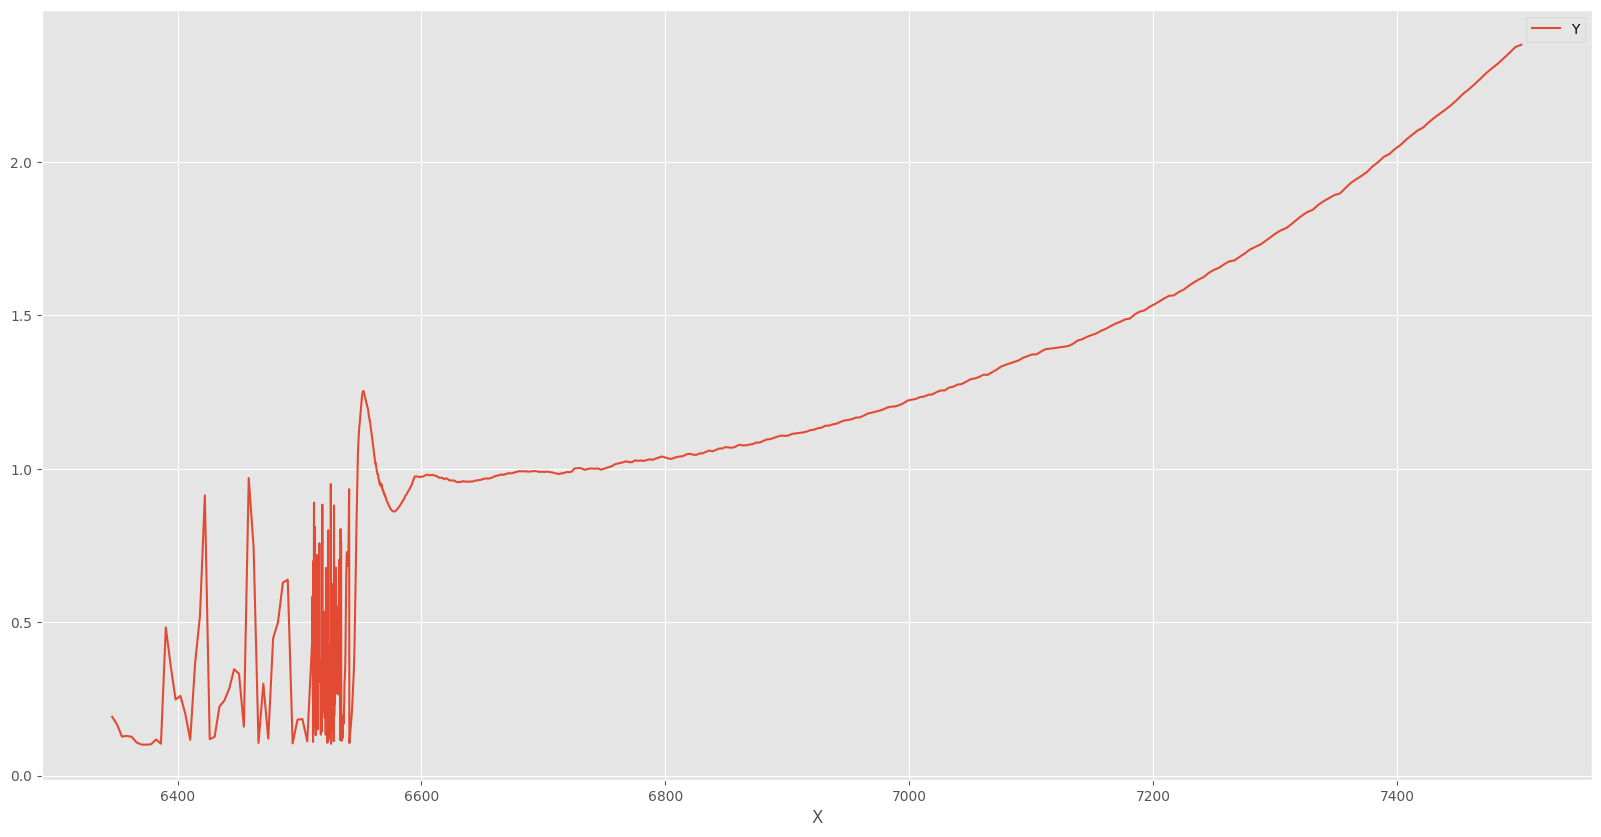

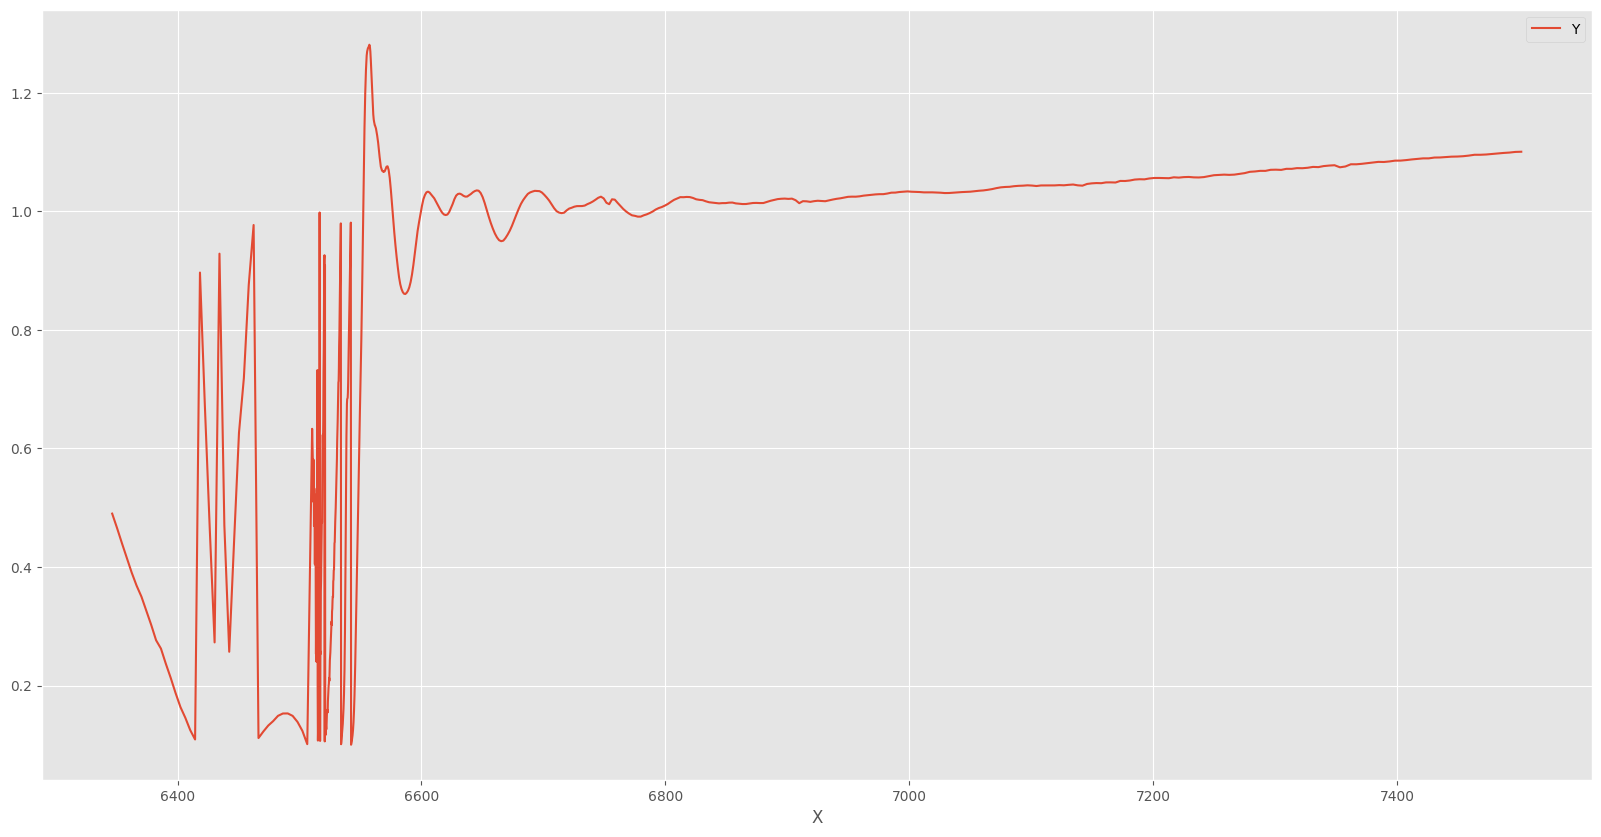

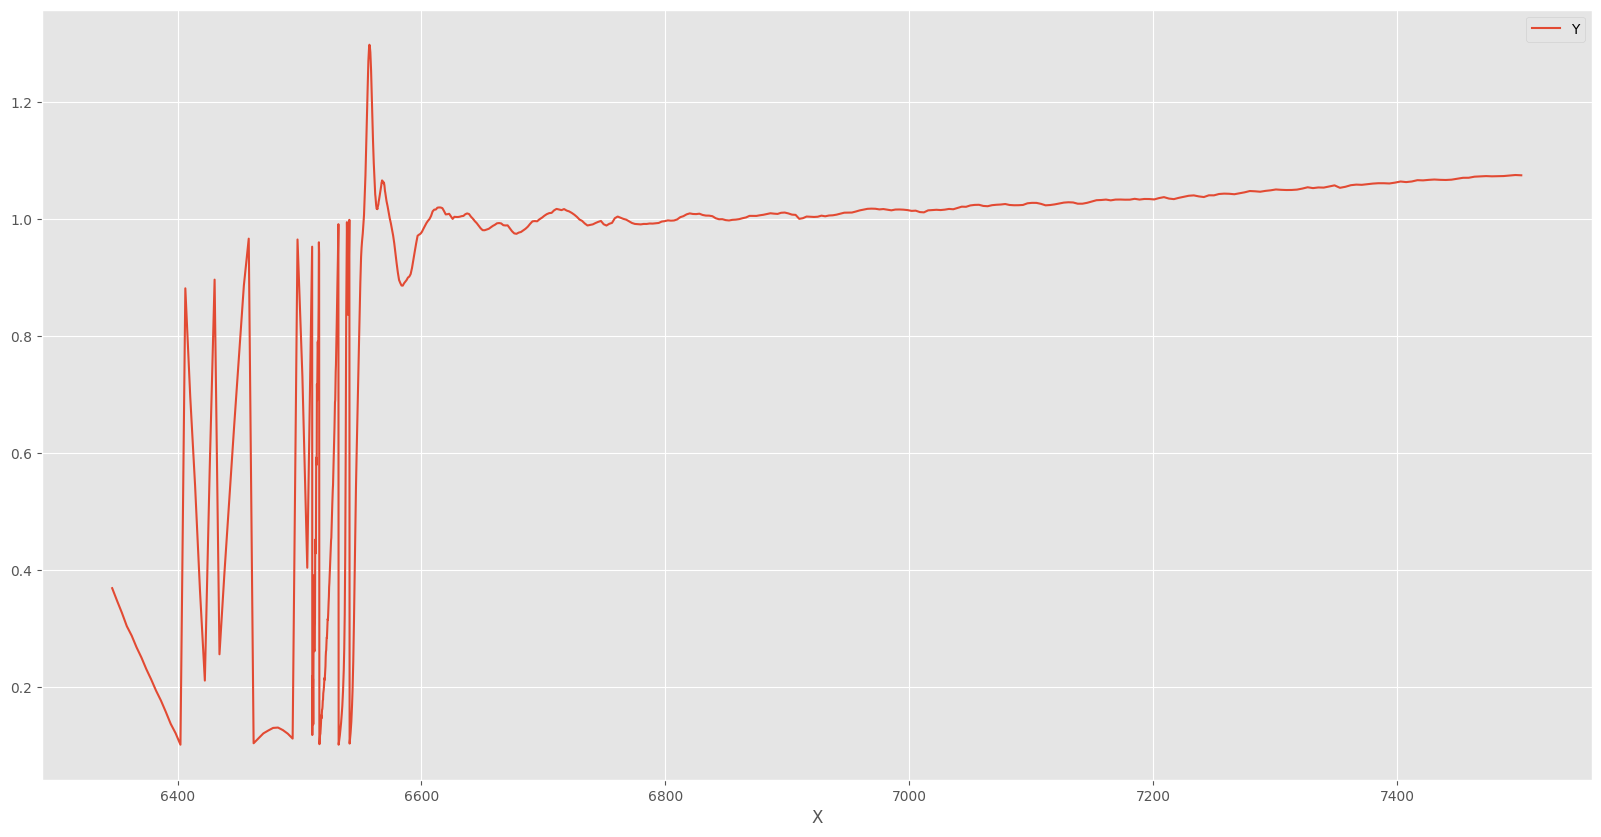

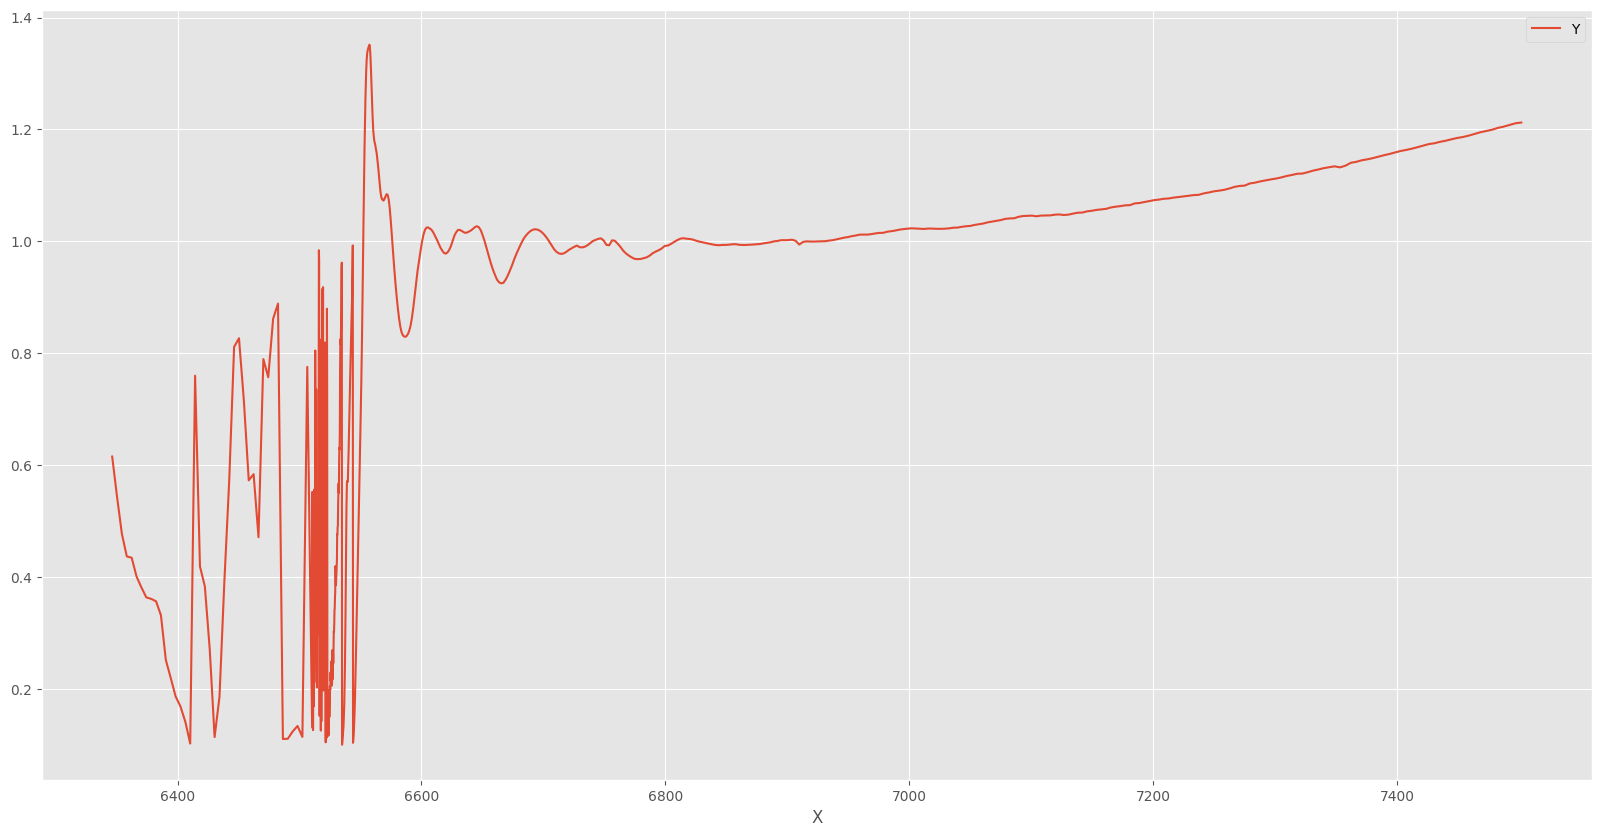

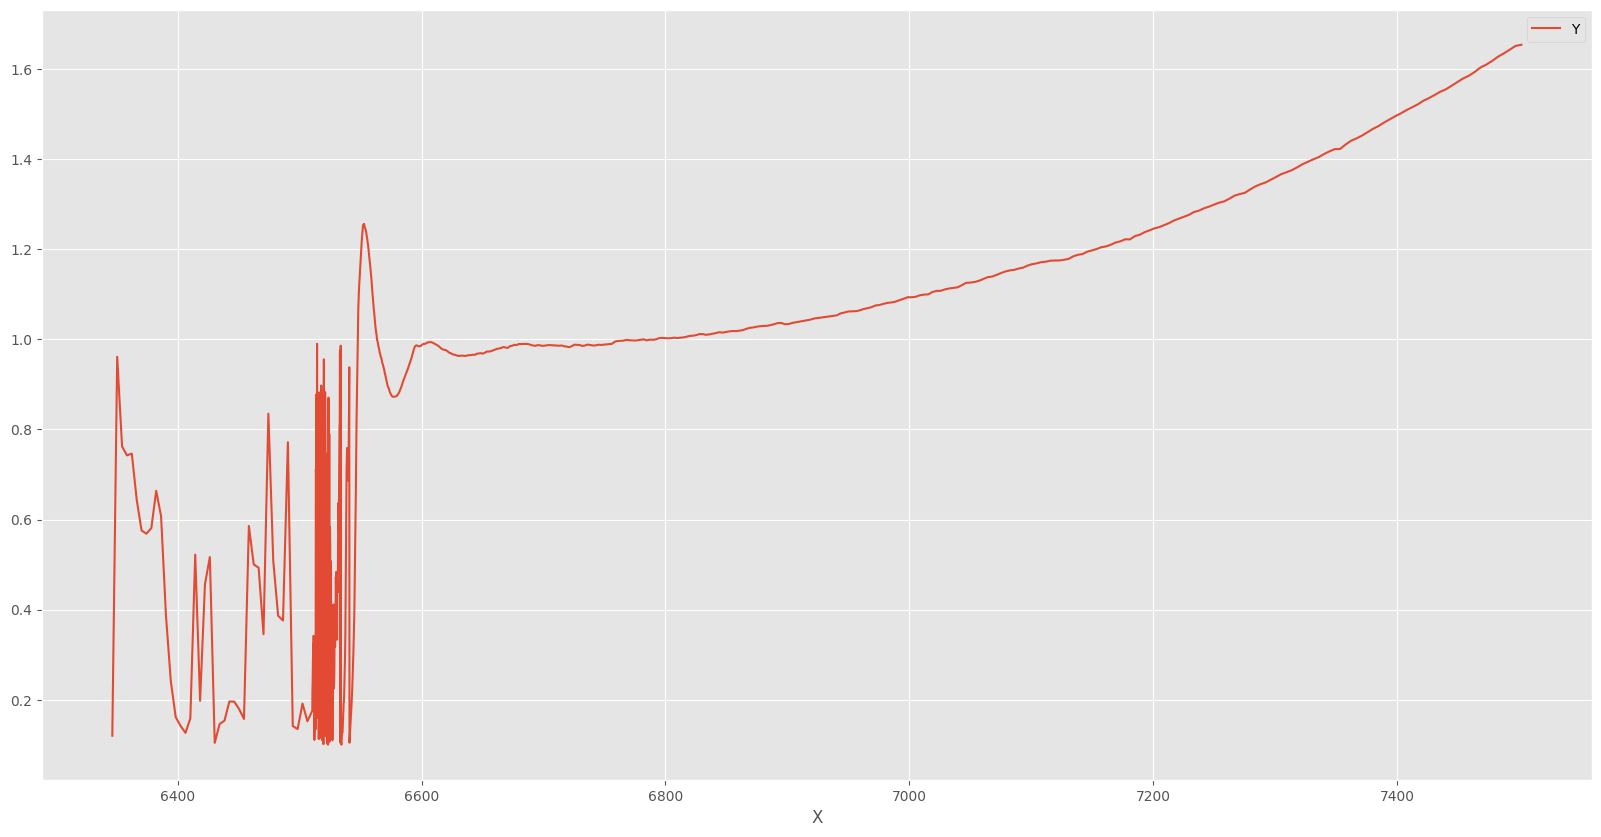

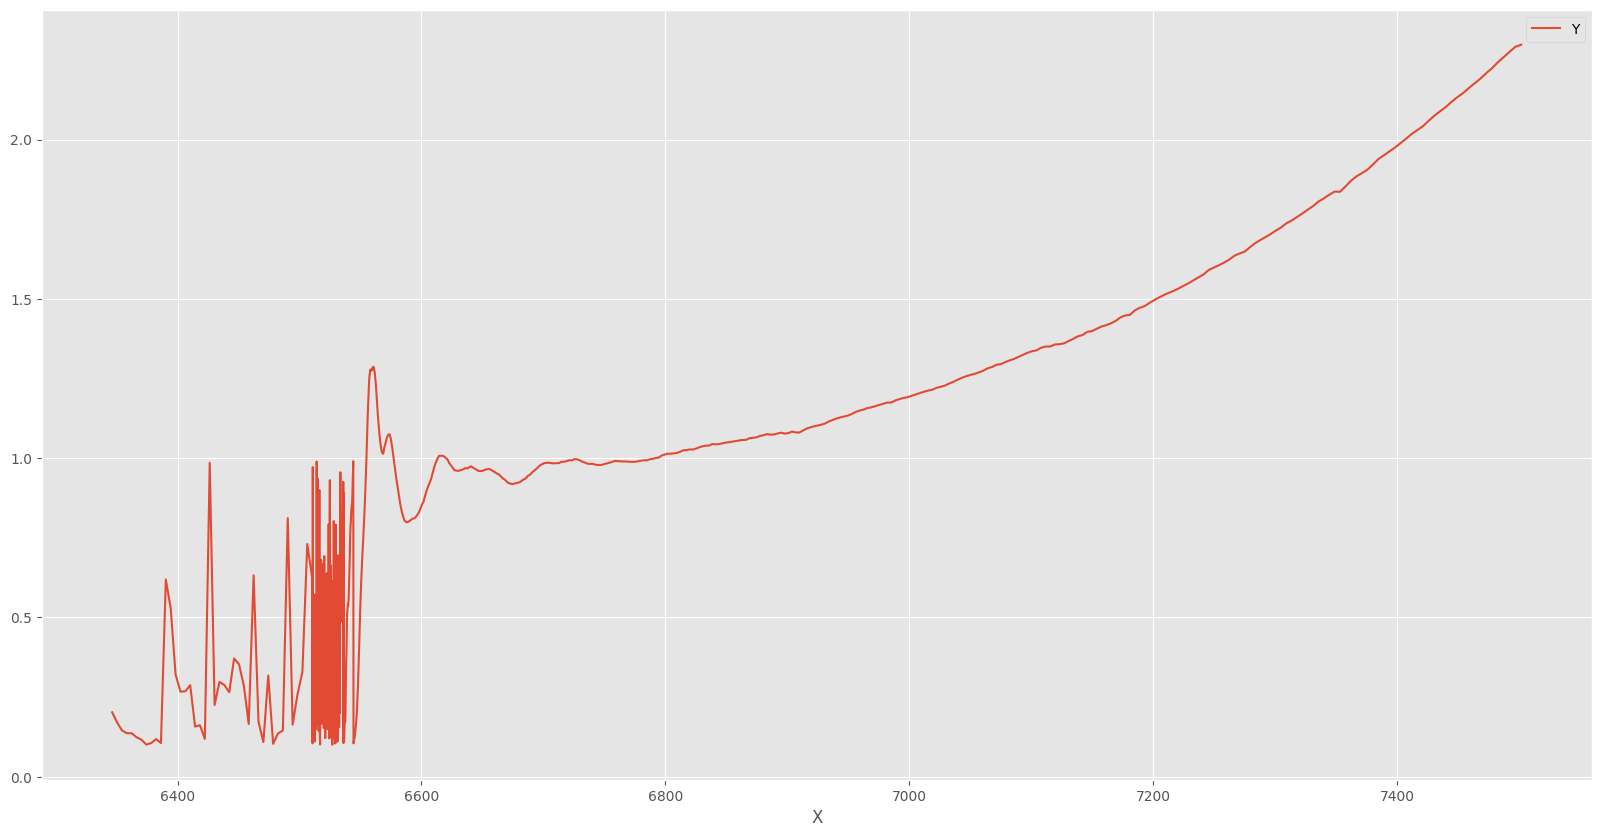

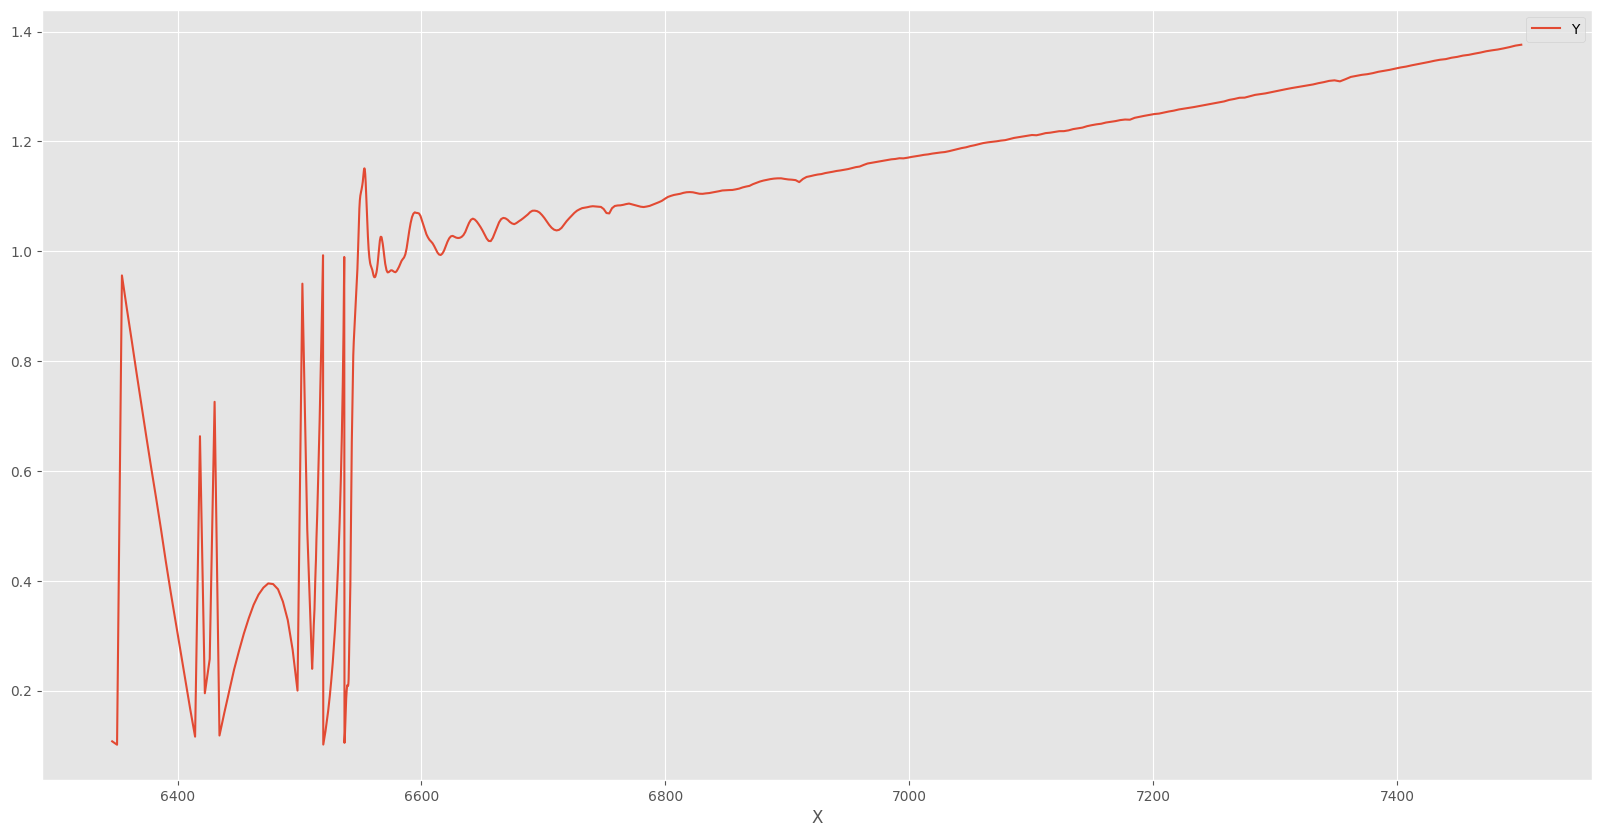

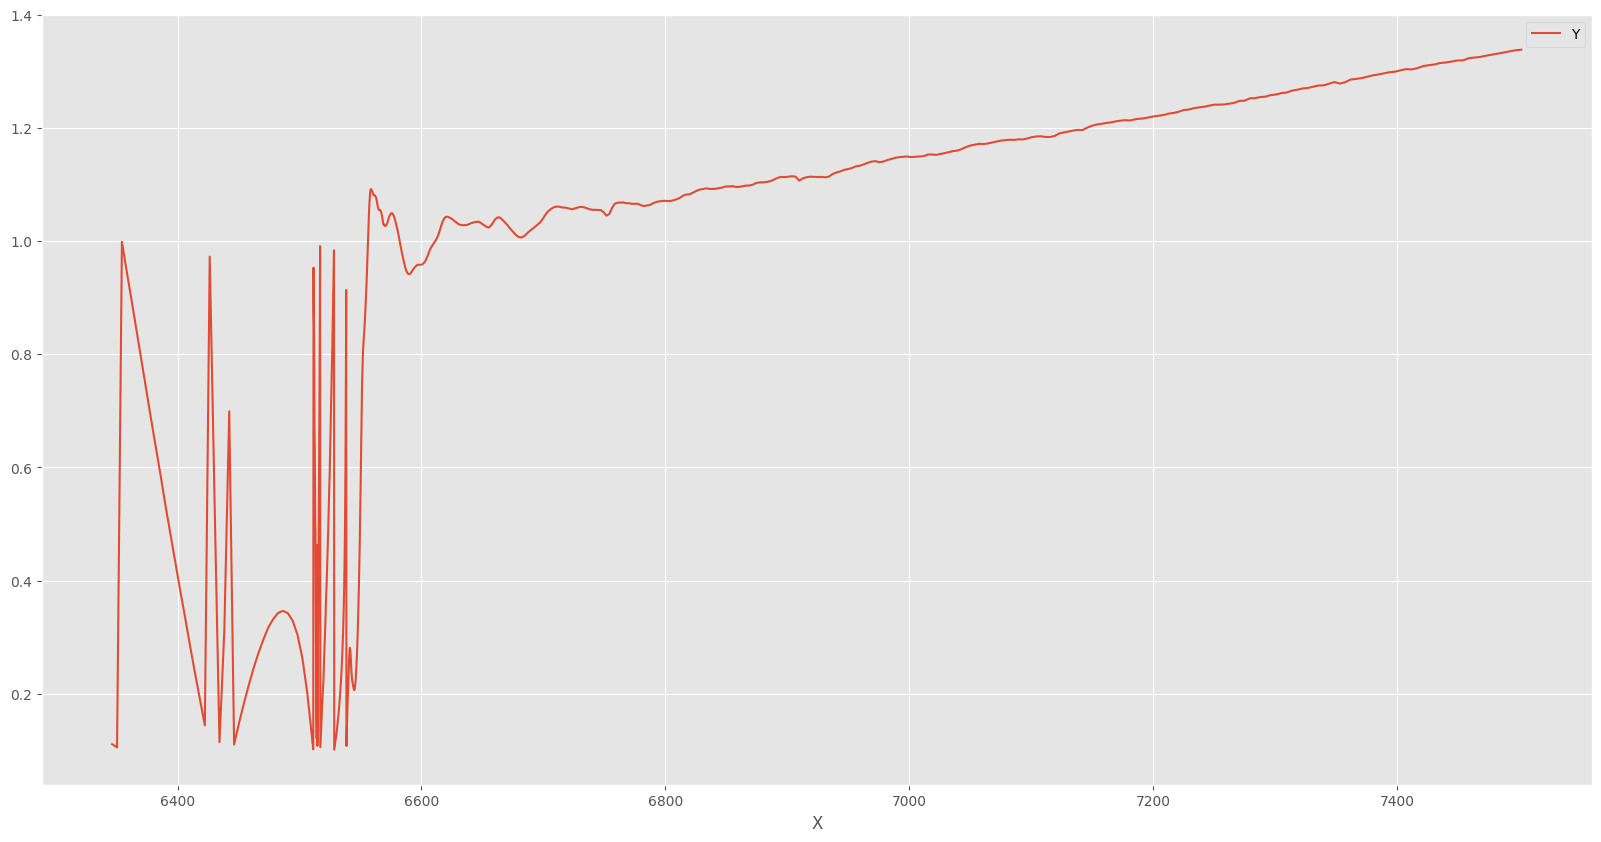

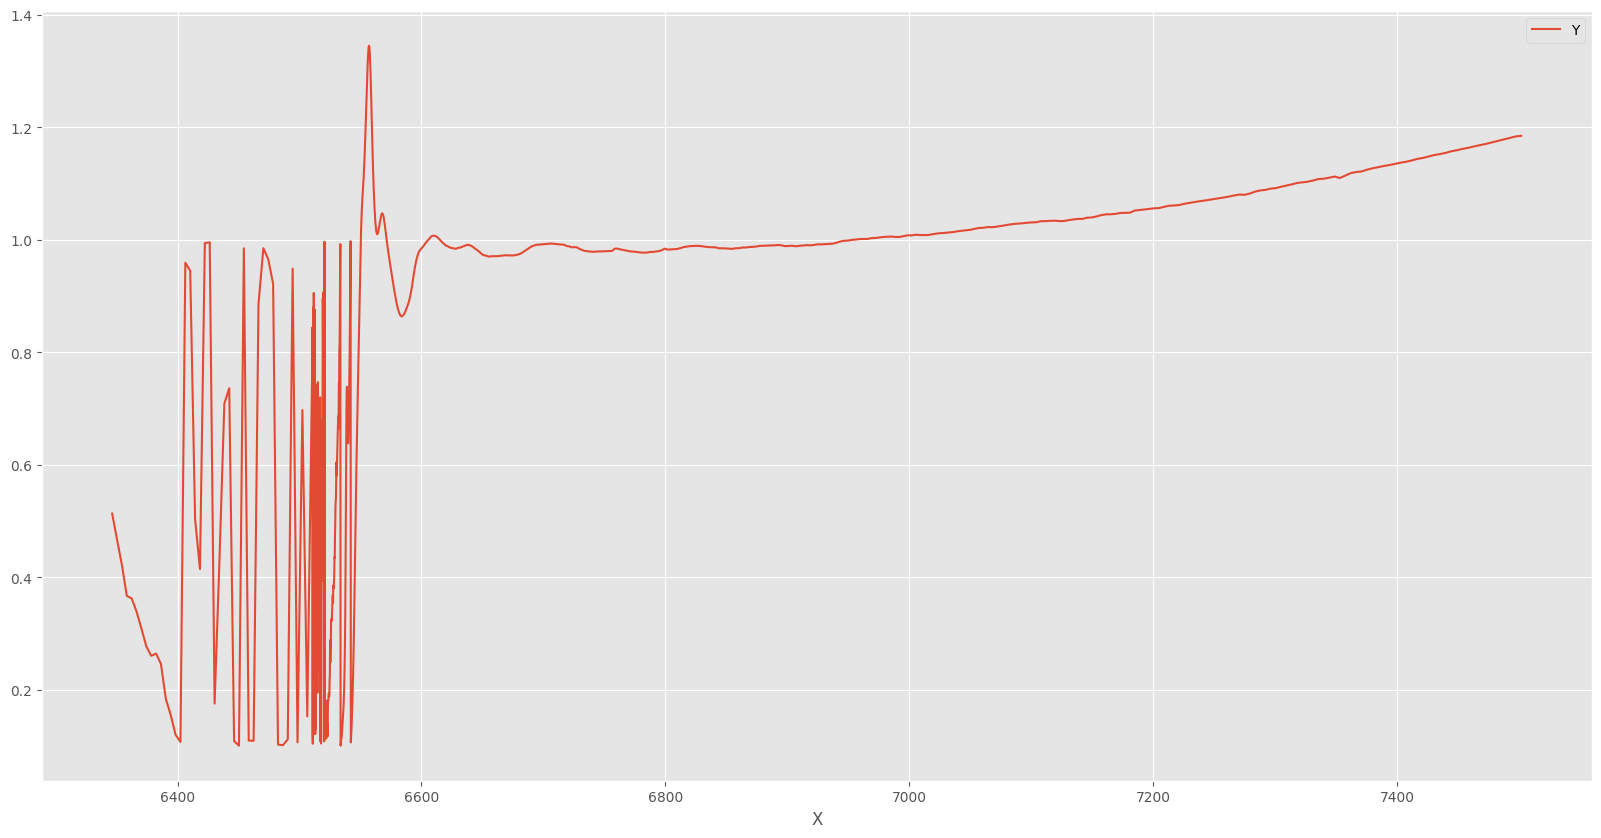

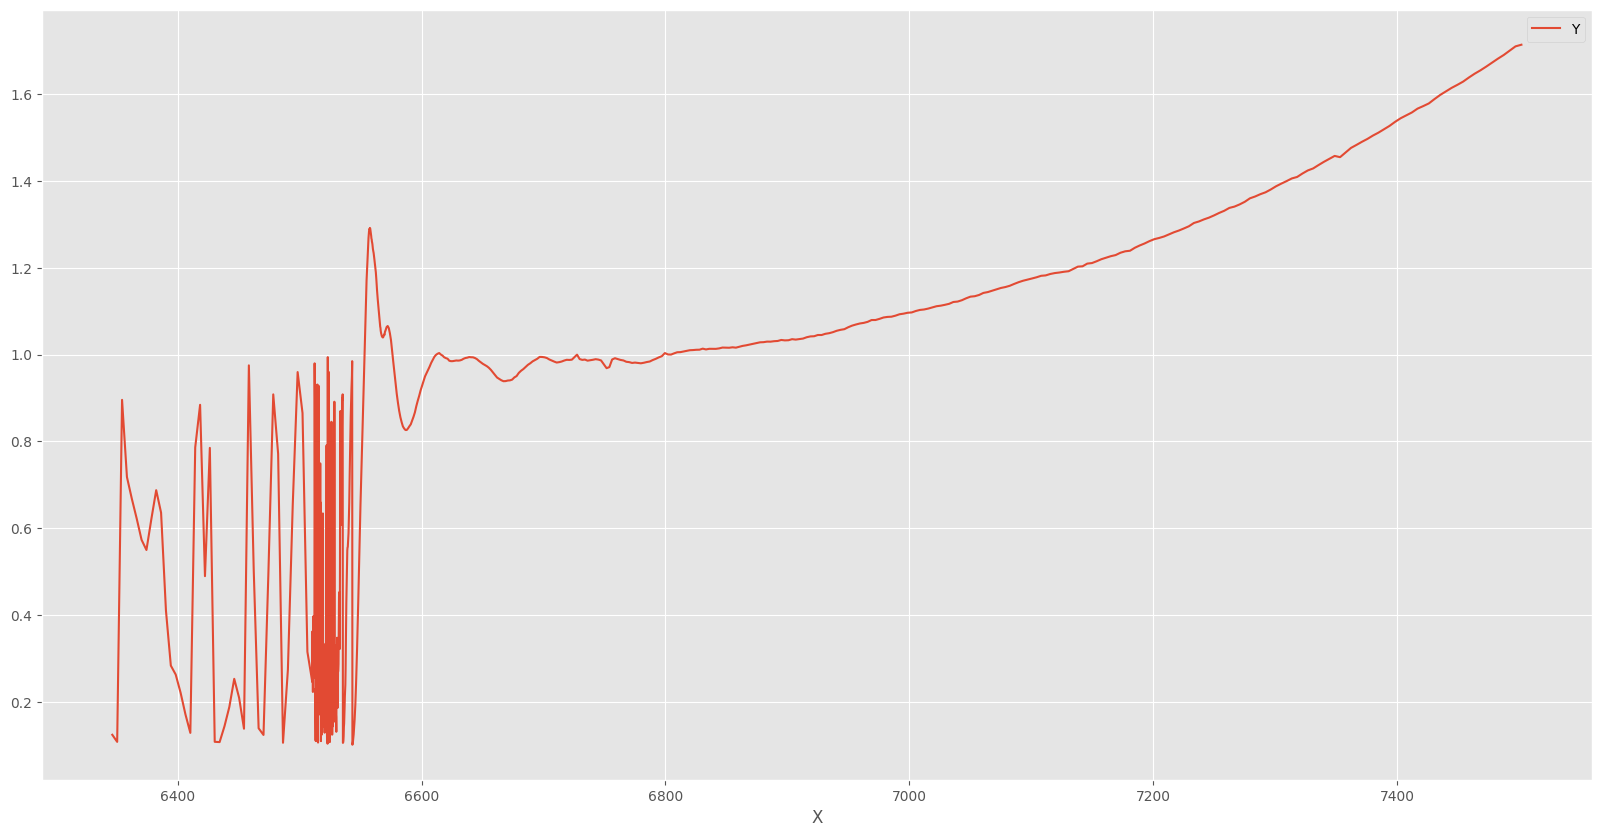

In [32]:
g.each_graph()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Ad

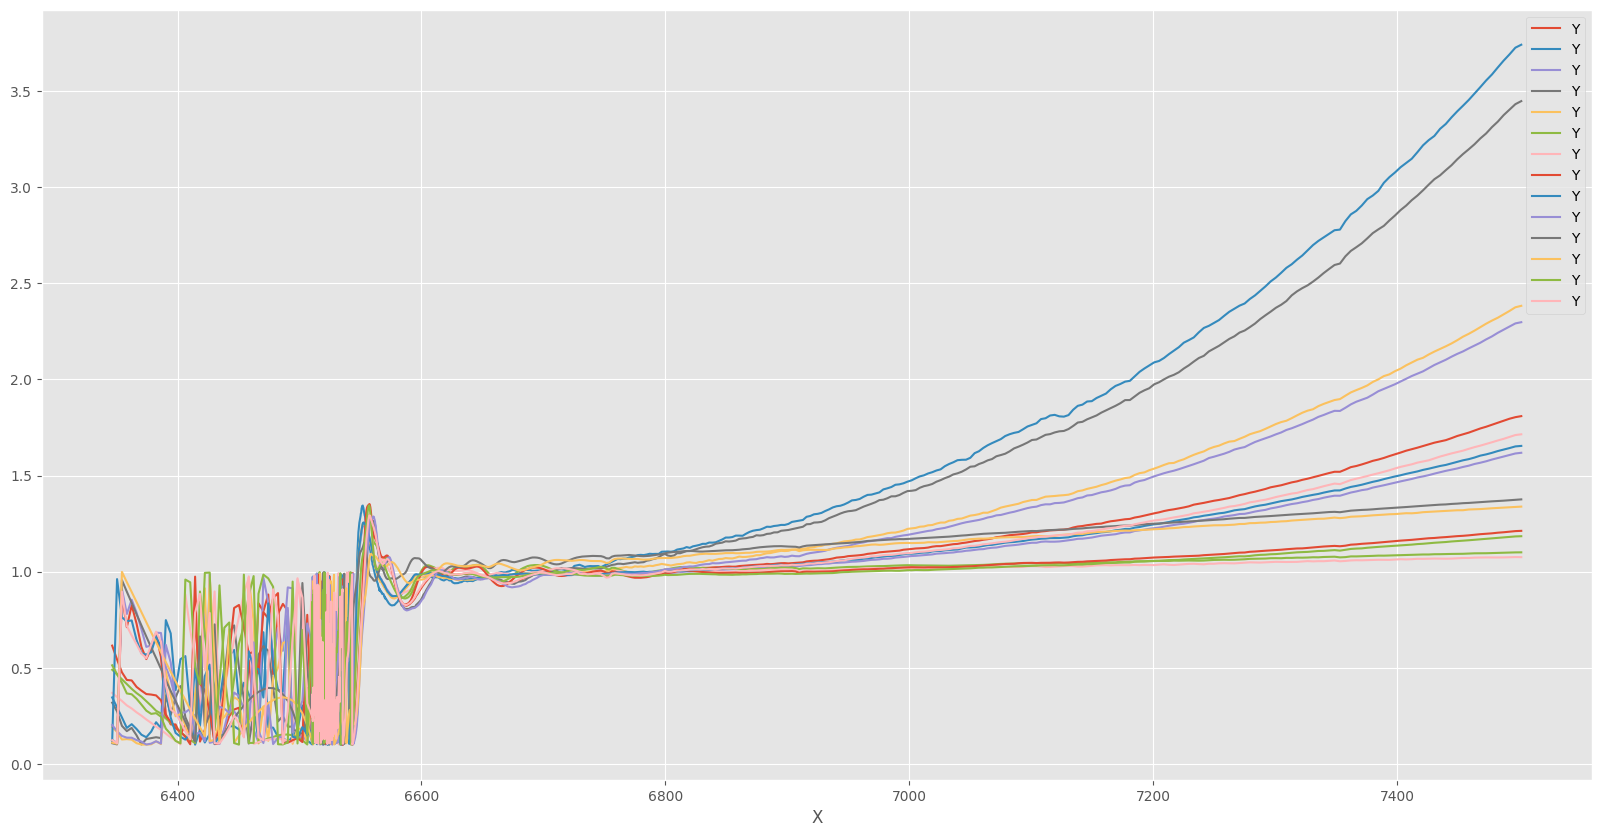

In [33]:
g.all_graphs()